In [5]:
import sys
sys.path.insert(0, '../airflow/plugins/utils/')

In [20]:
import pandas as pd
import numpy as np
import db
import matplotlib.pyplot as plt

In [8]:
login = 'trader'
password = 'income'
host = 'localhost'
port = 5432
dbname = 'stocks'
DB_URL = f"user={login} password={password} host={host} port={port} dbname={dbname}"
DB_URL

'user=trader password=income host=localhost port=5432 dbname=stocks'

In [12]:
def _get_db_url(connector: str) -> str:
    return 'user=trader password=income host=localhost port=5432 dbname=stocks'

In [13]:
db._get_db_url = _get_db_url

In [14]:
data = db.get_data_from_table('adsdf', 'aapl')

C:\Users\Samsung\Documents\Courses\algo-trading-python-airflow\tinkoff\notebooks\../airflow/plugins/utils\db.py:44 UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

In [15]:
data.head()

,time,open,high,low,close,volume
0,2022-09-11 04:00:00,157.81,158.44,156.94,156.94,232
1,2022-09-12 04:00:00,158.41,164.26,157.77,163.71,23452293
2,2022-09-13 04:00:00,164.10,164.90,153.38,154.20,31829409
3,2022-09-14 04:00:00,154.71,158.35,153.25,155.80,22053626
4,2022-09-15 04:00:00,155.63,156.00,151.01,151.32,20809555


In [18]:
SMA_SHORT = 50
SMA_LONG = 200

In [19]:
data['sma_short'] = data['close'].rolling(SMA_SHORT).mean()
data['sma_long'] = data['close'].rolling(SMA_LONG).mean()

<Axes: title={'center': 'CROSS_SMA: 50 and 200'}>

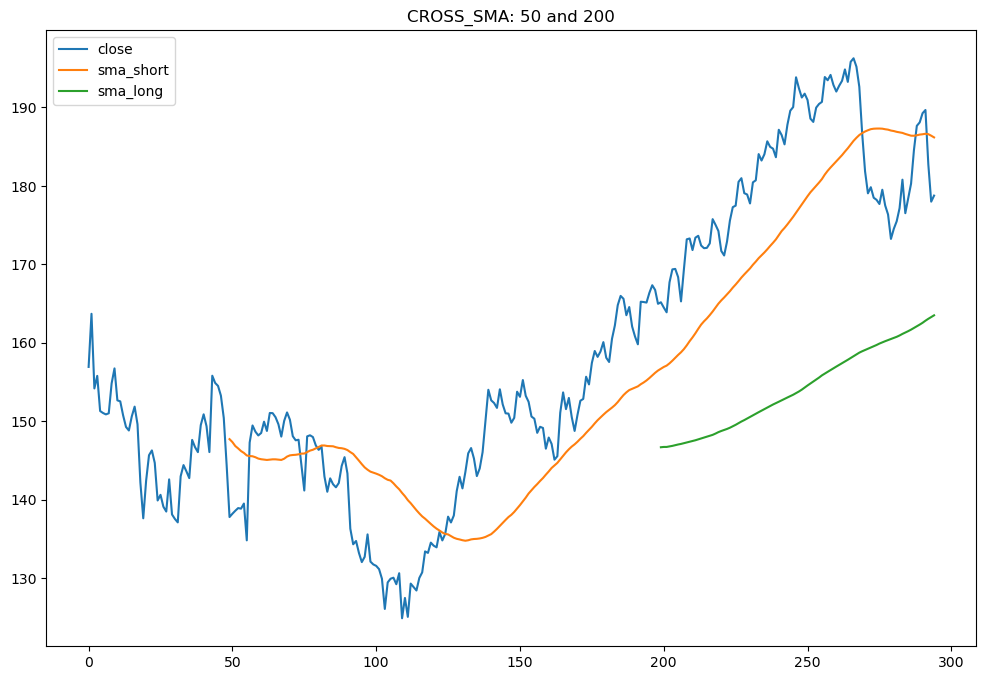

In [23]:
data[['close','sma_short','sma_long']]\
    .plot(figsize=(12, 8), title=f'CROSS_SMA: {SMA_SHORT} and {SMA_LONG}')

In [24]:
data['position'] = np.where(data['sma_short']>data['sma_long'], 1 ,-1)

In [25]:
data['position'].value_counts()

-1    199
 1     96
Name: position, dtype: int64

In [26]:
data.tail(10)

,time,open,high,low,close,volume,sma_short,sma_long,position
285,2023-08-25 04:00:00,176.58,179.14,175.46,178.41,13624519,186.5138,161.49805,1
286,2023-08-28 04:00:00,178.99,180.59,178.04,180.30,10733032,186.4060,161.69155,1
287,2023-08-29 04:00:00,180.30,184.90,179.32,184.58,14255045,186.3980,161.90370,1
288,2023-08-30 04:00:00,184.06,187.79,183.53,187.66,13844418,186.4562,162.12040,1
289,2023-08-31 04:00:00,187.89,189.11,186.96,188.10,18671888,186.5450,162.33370,1
290,2023-09-01 04:00:00,188.01,189.92,188.00,189.27,11408808,186.5872,162.56320,1
291,2023-09-05 04:00:00,188.94,189.98,187.09,189.68,12748142,186.6512,162.82995,1
292,2023-09-06 04:00:00,189.20,189.56,181.47,182.75,18322185,186.6002,163.07200,1
293,2023-09-07 04:00:00,182.14,182.14,173.54,178.00,26229760,186.4042,163.28820,1
294,2023-09-08 04:00:00,178.50,180.23,177.05,178.77,14234637,186.1878,163.51585,1


In [27]:
data.head()

,time,open,high,low,close,volume,sma_short,sma_long,position
0,2022-09-11 04:00:00,157.81,158.44,156.94,156.94,232,NaN,NaN,-1
1,2022-09-12 04:00:00,158.41,164.26,157.77,163.71,23452293,NaN,NaN,-1
2,2022-09-13 04:00:00,164.10,164.90,153.38,154.20,31829409,NaN,NaN,-1
3,2022-09-14 04:00:00,154.71,158.35,153.25,155.80,22053626,NaN,NaN,-1
4,2022-09-15 04:00:00,155.63,156.00,151.01,151.32,20809555,NaN,NaN,-1


In [29]:
data[['time', 'position']].tail(5).assign(strategy_type='sma')

,time,position,strategy_type
290,2023-09-01 04:00:00,1,sma
291,2023-09-05 04:00:00,1,sma
292,2023-09-06 04:00:00,1,sma
293,2023-09-07 04:00:00,1,sma
294,2023-09-08 04:00:00,1,sma
